<a href="https://colab.research.google.com/github/ASGKJune/junebot/blob/main/Concrete_Strength_ASGK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cement Strength Prediction by using Linear Regression
## Challenge
* A construction materials company wants to estimate the compressive strength of cement given certain material compositions and curing time.
* Cement strength is influenced by factors like the mix of raw materials (cement, fly ash, slag, aggregates), additives such as superplasticizers, and the age of curing. These directly impact safety, durability, and cost-efficiency in construction projects.
* Your job as a data scientist is to figure out which factors contribute the most to cement strength and provide data-driven insights for optimizing mixtures that balance performance, cost, and sustainability. Predict the compressive strength (MPa) of cement mixtures given their composition and curing time.

# Data description
* The dataset contains records of different cement mixtures and their measured compressive strength.
* Features (Inputs):
* Cement (kg/m³): Primary binding material in concrete.
* Blast Furnace Slag (kg/m³): Supplementary cementitious material that enhances durability.
* Fly Ash (kg/m³): Byproduct additive that improves workability and reduces cost.
* Water (kg/m³): Amount of water added; critical for hydration and strength balance.
* Superplasticizer (kg/m³): Chemical admixture that improves workability without extra water.
* Coarse Aggregate (kg/m³): Large stone particles providing bulk and strength.
* Fine Aggregate (kg/m³): Sand or small particles improving compactness.
* Age (days): Number of curing days (e.g., 1, 7, 28) before strength testing.
* Target (Output):
* Strength (MPa) → Concrete compressive strength

# Business Metrics
* Stronger & Safer Construction → Reliable predictions reduce the risk of weak mixtures.
* Cost Efficiency → Optimize material usage without overspending on cement.
* Faster Project Delivery → Identify curing times that achieve required strength quickly.
* Sustainability → Promote eco-friendly practices by maximizing slag and fly ash use.


## Setup and Data Preparation:
- Import necessary libraries such as `pandas`, `matplotlib`, `seaborn`, and `scikit-learn`.  
- Load the dataset for regression analysis.  
- Conduct exploratory data analysis (EDA) to understand the dataset.  
- Preprocess the data by handling missing values, encoding categorical variables, and normalizing/standardizing features if needed.

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the file

df = pd.read_csv('/content/concrete_data.csv')

In [ ]:
# Information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
# Checking for Null values

df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [ ]:
# From the above we can infer that there are no null values in this dataset.

In [ ]:
# Checking for duplicate values

df.duplicated().sum()

np.int64(25)

In [ ]:
# From the above we can infer that there are 25 duplicates in this dataset.

In [ ]:
duplicated = df[df.duplicated()]
print(duplicated)

     Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
77    425.0               106.3      0.0  153.5              16.5   
80    425.0               106.3      0.0  153.5              16.5   
86    362.6               189.0      0.0  164.9              11.6   
88    362.6               189.0      0.0  164.9              11.6   
91    362.6               189.0      0.0  164.9              11.6   
100   425.0               106.3      0.0  153.5              16.5   
103   425.0               106.3      0.0  153.5              16.5   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
123   425.0               106.3      0.0  153.5              16.5   
126   425.0               106.3      0.0  153.5              16.5   
132   362.6               189.0      0.0  164.9              11.6   
134   362.6               189.0      0.0  164.9              11.6   
137   362.6               189.0   

In [ ]:
#Checking whether the same row is dupliacted and look at the other row which is same

df.loc[df.duplicated(keep=False)]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
72,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
83,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
95,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20


In [ ]:
# Removing the duplicates

df.drop_duplicates(keep='last', inplace=True)

In [ ]:
# Checking whether the duplicated row has been dropped

df.loc[df.duplicated(keep=False)]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength


In [ ]:
# Having the statistical insight of the dataset

df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


* Insights:
* The minimum and the 1st quartile are zero for Blast Furnace Slag and Superplasticizer.
* For Fly Ash, the minimum, 1st quartile and median are zero.
* The quartile range is more spread out for attributes like Cement, Blast Furnace Slag, Fly Ash and Age.

In [ ]:
# Finding out the coefficient, as there are no categorical variable, we can find out the coefficients for the entire set together.

df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
Blast Furnace Slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
Fly Ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
Water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
Superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
Coarse Aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
Fine Aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
Age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
Strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


* Insights:
* Somewhat correlation exists between the following:
* a) Negative correlation between Cement and Fly Ash
* b) Negative correlation between Cement and Blast Furnace Slag
* c) Positive correlation between Cement and Strength
* d) Positive correlation between Fly Ash and Superplasticizer
* e) Negative correlation between Fly Ash and Blast Furnace Slag
* f) Positive correlation between Strenght and Age
* g) Positive correlation between Superplasticizer and Strength
* There exists a strong negative correlation between:
* a) Superplasticizer and Water

In [ ]:
# Now we will split the dataframe into test and train.

from sklearn.model_selection import train_test_split

X = df.drop('Strength', axis=1)
y = df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Now we will apply scaling by StandardScaler, as the units of the independent variables are different.

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

sc = std_scaler.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

# 2. Simple Linear Regression:
- Select one independent variable (predictor) and one dependent variable (response).  
- Train a Simple Linear Regression model using the selected variables.  
- Visualize the regression line on a scatter plot to show the relationship between the predictor and response variable.  


In [ ]:
# Train a Simple Linear Regression model using the selected variables.

# For Simple Linear Regression, let's select 'Cement' as the independent variable
X_simple = X_train[['Cement']]
y_simple = y_train

reg_simple = LinearRegression().fit(X_simple, y_simple)
train_score_simple = reg_simple.score(X_simple, y_simple)
test_score_simple = reg_simple.score(X_test[['Cement']], y_test)

print(f"Training score for Simple Linear Regression: {train_score_simple}")
print(f"Test score for Simple Linear Regression: {test_score_simple}")

Training score for Simple Linear Regression: 0.2593397027992509
Test score for Simple Linear Regression: 0.1950501862119074


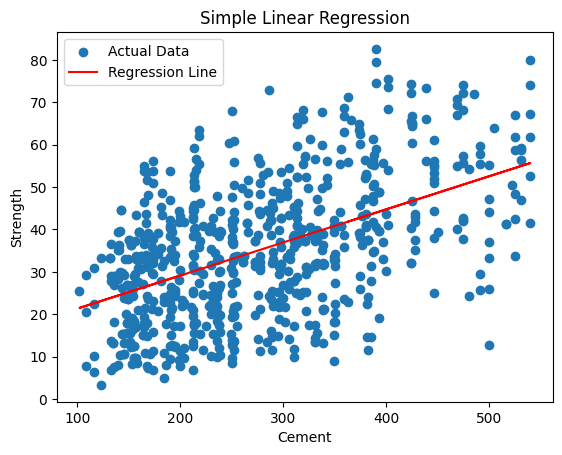

In [ ]:
# Visualize the regression line on a scatter plot to show the relationship between the predictor (Cement) and response variable (Strength)

plt.scatter(X_simple, y_simple, label='Actual Data')
plt.plot(X_simple, reg_simple.predict(X_simple), color='red', label='Regression Line')
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

3. Multiple Linear Regression:
- Select multiple independent variables (predictors) and one dependent variable (response).  
- Train a Multiple Linear Regression model using the selected features.  
- Analyze the regression coefficients to understand the impact of each predictor on the response variable.

In [ ]:
# Next we try to understand how well this mutiple linear regression model fits training data vs unseen test data.

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train)
train_score = reg.score(X_train_scaled, y_train)

test_score = reg.score(X_test_scaled, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.6195248285258241
Test Score: 0.5685889855791149


In [ ]:
# Extracting and displaying the learned coefficients of the trained linear regression model in a table.


feature_names = X.columns
coefs = reg.coef_

coefs_df = pd.DataFrame({'Feature': feature_names, 'Coefficients': coefs})
print(coefs_df)

              Feature  Coefficients
0              Cement     12.485408
1    Superplasticizer      8.762353
2                 Age      5.938950
3  Blast Furnace Slag     -2.558604
4             Fly Ash      1.856315
5    Coarse Aggregate      1.221494
6      Fine Aggregate      2.013182
7               Water      6.827193


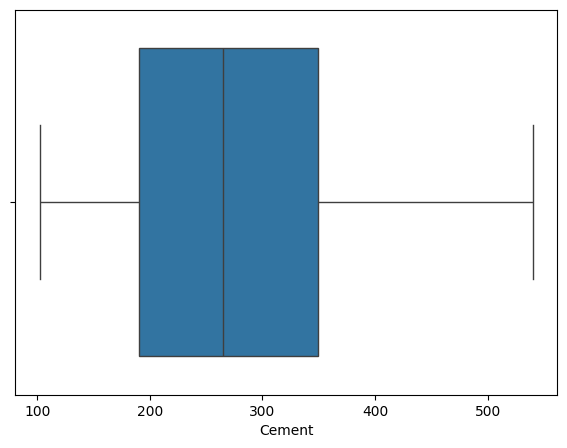

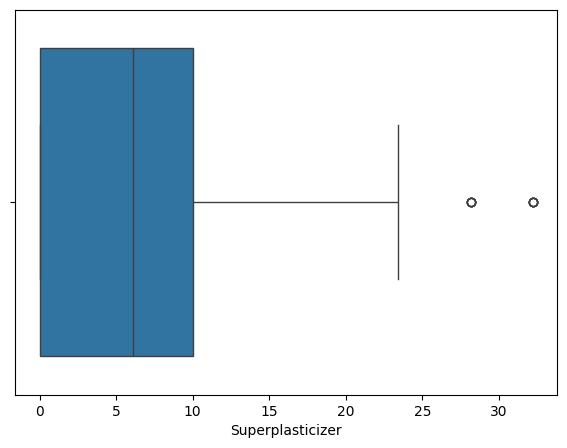

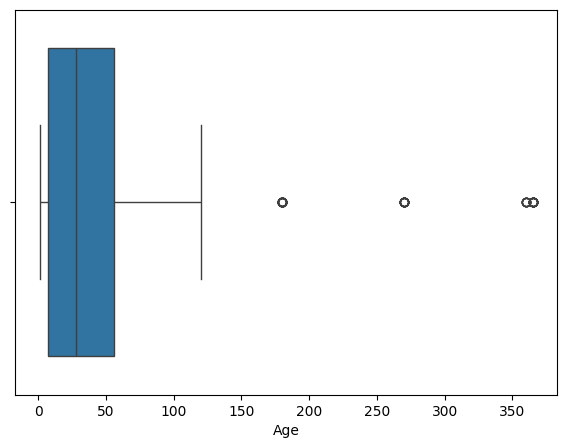

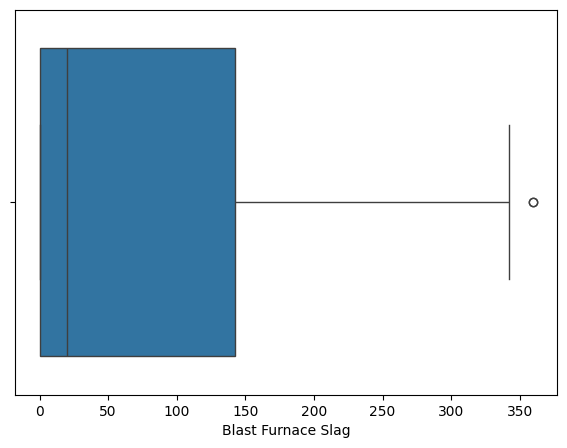

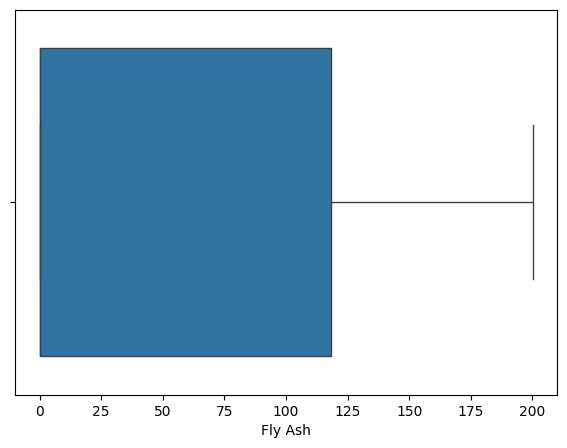

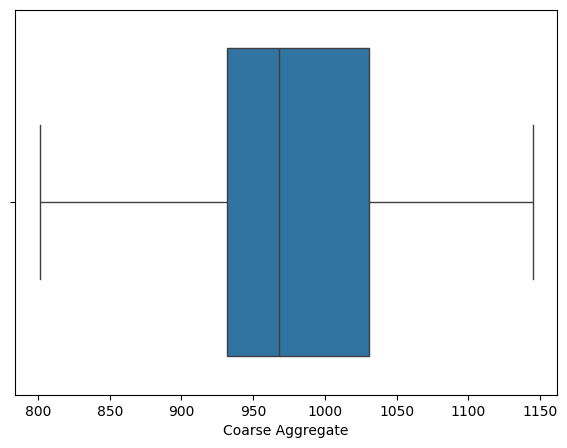

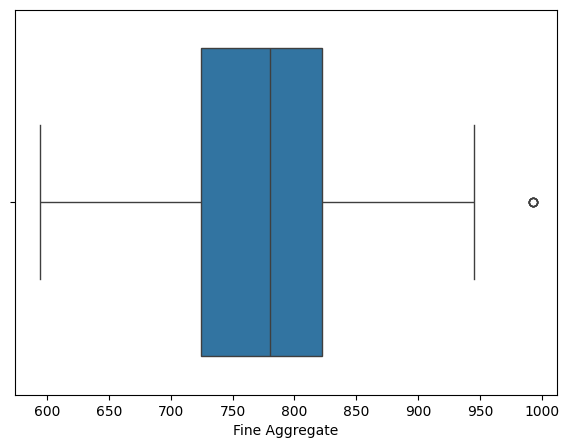

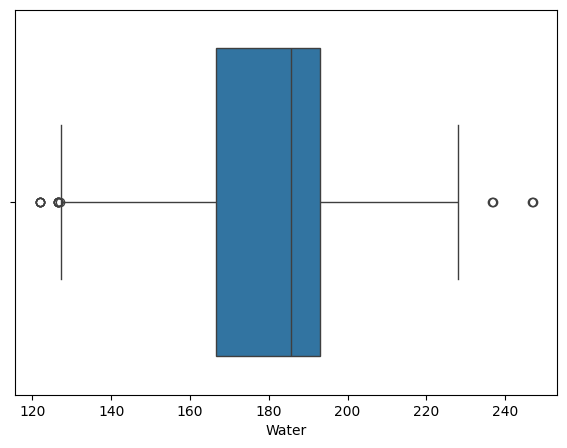

In [ ]:
# We will now make boxplot visualization for each independent variable to check whether outliers.

for col in X.columns:
  plt.figure(figsize=(7,5))
  sns.boxplot(x=df[col])
  plt.show()

* Insights:
* From the above graphs we can understand that there are outliers in the following independent variable: Age, Fine Aggregate, Superplasticizer, Water and Blast Furnace Slag.

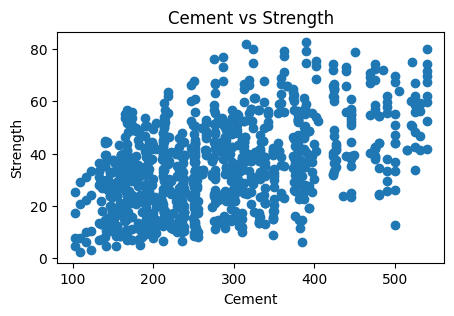

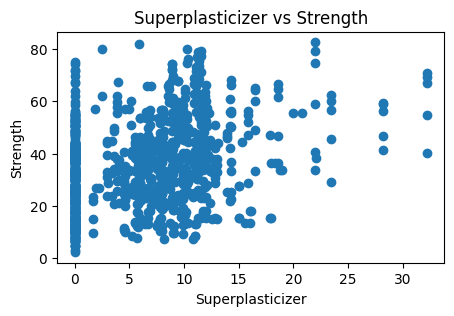

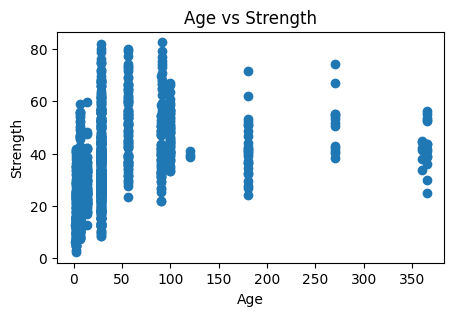

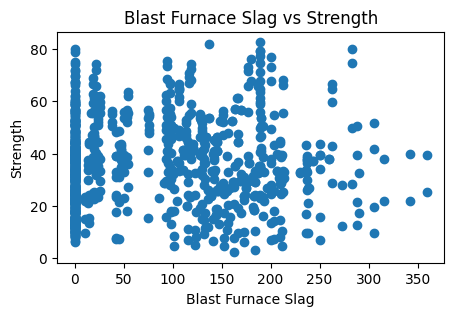

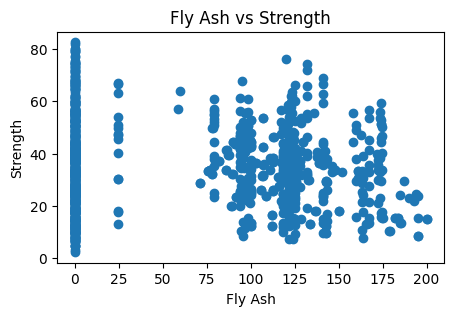

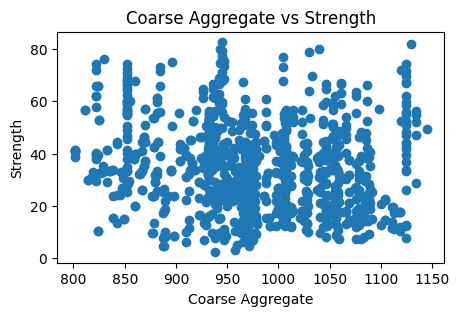

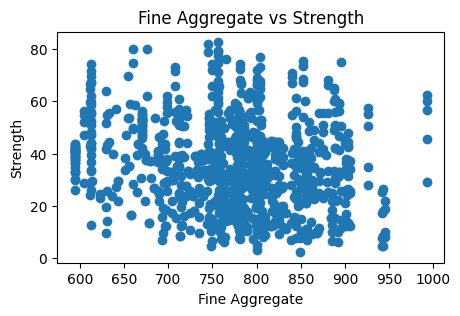

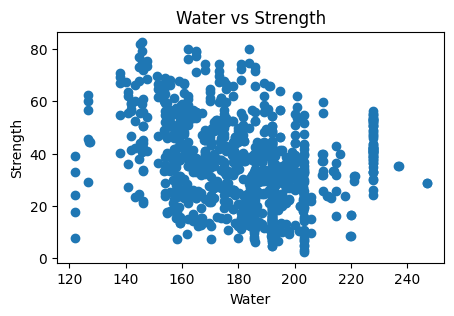

In [ ]:
# Now we will check for the Scatter Plots for visual linearity.

# Plot scatter plots for each independent variable vs dependent variable
for col in X.columns:
    plt.figure(figsize=(5,3))
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel("Strength")
    plt.title(f"{col} vs Strength")
    plt.show()

* From the above, we can confirm that there is no apparent linear relationship between the independent variables and the dependent variable (Strength), except for the independent variable Cement, where a mild linear relationship exists between Cement and Strength.


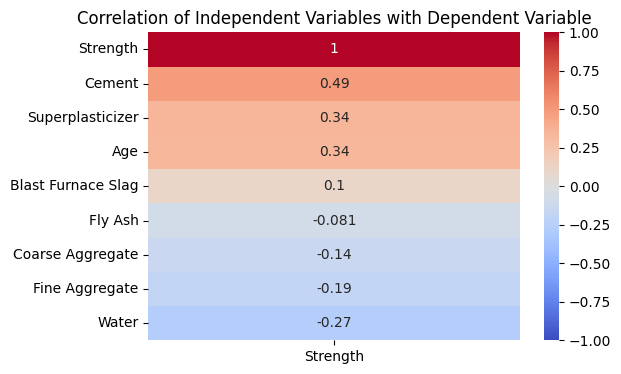

In [ ]:
# Correlation Heatmap (quick check)

# Correlation matrix including y
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr[['Strength']].sort_values(by='Strength', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Independent Variables with Dependent Variable")
plt.show()

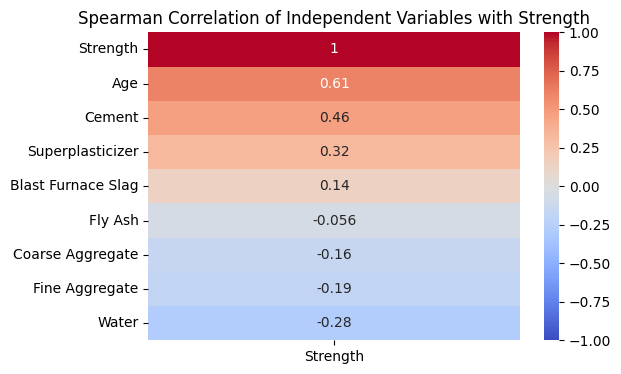

In [ ]:
# Spearman correlation with dependent variable
spearman_corr = df.corr(method='spearman', numeric_only=True)

# Heatmap for correlations with Strength (y)
plt.figure(figsize=(6,4))
sns.heatmap(spearman_corr[['Strength']].sort_values(by='Strength', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation of Independent Variables with Strength")
plt.show()

In [ ]:
import statsmodels.api as sm

X = df[['Cement', 'Superplasticizer', 'Age', 'Blast Furnace Slag', 'Fly Ash', 'Coarse Aggregate', 'Fine Aggregate', 'Water']]
y = df['Strength']

# Add constant for intercept
X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sat, 27 Sep 2025   Prob (F-statistic):          2.40e-194
Time:                        04:48:16   Log-Likelihood:                -3764.4
No. Observations:                1005   AIC:                             7547.
Df Residuals:                     996   BIC:                             7591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -17.9198     26

* Insights:
* R-squared: 0.604 → About 60.4% of the variation in Strength is explained by the independent variables (cement, water, age, etc.).
* Adj. R-squared: 0.601 → Very close to R², meaning the model is not overfitting much. It adjusts for the number of predictors.
* F-statistic: 189.8, Prob (F-statistic): 2.40e-194 → Very significant. The model overall is statistically meaningful (at least one predictor has a nonzero effect).
* Significant positive contributors: Cement, Superplasticizer, Age, Slag, Fly Ash.
* Significant negative contributor: Water.
* Aggregates (coarse, fine) have weak or borderline effects.
* Multicollinearity might be an issue → consider Ridge/Lasso regression.

4. Model Evaluation:
- Calculate evaluation metrics for both Simple and Multiple Linear Regression models:  
  - Mean Squared Error (MSE)  
  - Mean Absolute Error (MAE)  
  - R-squared (R²)  
  - Adjusted R-squared (Adjusted R²)  
- Compare the performance of both models and justify the results.

In [ ]:
# Predict on the test data using the simple and multiple linear regression model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_simple = reg_simple.predict(X_test[['Cement']])

# Calculate evaluation metrics for Simple Linear Regression
# --- Evaluation Metrics ---
# Mean Squared Error
mse_simple = mean_squared_error(y_test, y_pred_simple)

# Mean Absolute Error
mae_simple = mean_absolute_error(y_test, y_pred_simple)

# R-squared
r2_simple = r2_score(y_test, y_pred_simple)

# Adjusted R-squared
n_simple = X_test.shape[0]   # number of observations
p_simple = X_simple.shape[1]   # number of predictors for simple linear regression (here = 1)
adj_r2_simple = 1 - (1-r2_simple) * (n_simple-1)/(n_simple-p_simple-1)


print("Simple Linear Regression Metrics:")
print("Mean Squared Error (MSE):", mse_simple)
print("Mean Absolute Error (MAE):", mae_simple)
print("R-squared (R2):", r2_simple)
print("Adjusted R-squared:", adj_r2_simple)


# Predict on the test data using the multiple linear regression model
y_pred_multiple = reg.predict(X_test_scaled)


# Calculate evaluation metrics for Multiple Linear Regression
# --- Evaluation Metrics ---
# Mean Squared Error
mse_multiple = mean_squared_error(y_test, y_pred_multiple)

# Mean Absolute Error
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)

# R-squared
r2_multiple = r2_score(y_test, y_pred_multiple)

# Adjusted R-squared
n_multiple = X_test_scaled.shape[0]   # number of observations
p_multiple = X_test_scaled.shape[1]   # number of predictors for multiple linear regression
adj_r2_multiple = 1 - (1-r2_multiple) * (n_multiple-1)/(n_multiple-p_multiple-1)


print("\nMultiple Linear Regression Metrics:")
print("Mean Squared Error (MSE):", mse_multiple)
print("Mean Absolute Error (MAE):", mae_multiple)
print("R-squared (R2):", r2_multiple)
print("Adjusted R-squared:", adj_r2_multiple)

Simple Linear Regression Metrics:
Mean Squared Error (MSE): 233.46968043275322
Mean Absolute Error (MAE): 12.529386603430968
R-squared (R2): 0.1950501862119074
Adjusted R-squared: 0.1923670201659471

Multiple Linear Regression Metrics:
Mean Squared Error (MSE): 125.1275420488878
Mean Absolute Error (MAE): 8.951931617209585
R-squared (R2): 0.5685889855791149
Adjusted R-squared: 0.5568098452536299


* Insights:
1. Mean Squared Error (MSE)
* Simple Linear Regression (SLR): 233.47 and
* Multiple Linear Regression (MLR): 125.13
* MLR has a much lower MSE, meaning on average, the squared deviations from the actual strength values are smaller. This indicates better predictive accuracy.

2. Mean Absolute Error (MAE)
* SLR: 12.53
* MLR: 8.95
* Again, MLR has a lower MAE, meaning the average absolute prediction error is smaller. Predictions from MLR are closer to actual values compared to SLR.

3. R-squared (R²)
* SLR: 0.195 → Only 19.5% of variance explained.
* MLR: 0.569 → Explains about 56.9% of variance.
* MLR does a much better job of capturing variability in the dependent variable (Strength). SLR is quite weak.

4. Adjusted R-squared
* SLR: 0.192
* MLR: 0.557
* Adjusted R² penalizes extra variables. The fact that MLR’s Adjusted R² is still very high compared to SLR shows that the additional predictors genuinely improve the model (not just overfitting).

5. Justification
* SLR uses only one predictor (probably Cement or Age). This cannot capture the complexity of concrete strength, which depends on multiple ingredients (cement, water, slag, fly ash, etc.) and curing age.
* MLR uses multiple predictors simultaneously. Concrete strength is influenced by a combination of materials and conditions, so a multivariate approach naturally explains more variance and reduces error.
* That is why MLR outperforms SLR on all metrics (MSE, MAE, R², Adjusted R²).

* Conclusion: Multiple Linear Regression is clearly superior here. It captures the multifactor nature of concrete strength, giving better accuracy and explanatory power. Simple Linear Regression is too limited for this type of problem.

5. Residual Analysis:
- Perform residual analysis to validate the assumptions of Linear Regression:  
  - Linearity  
  - Homoscedasticity (constant variance)  
  - Independence of errors  
  - Normality of residuals

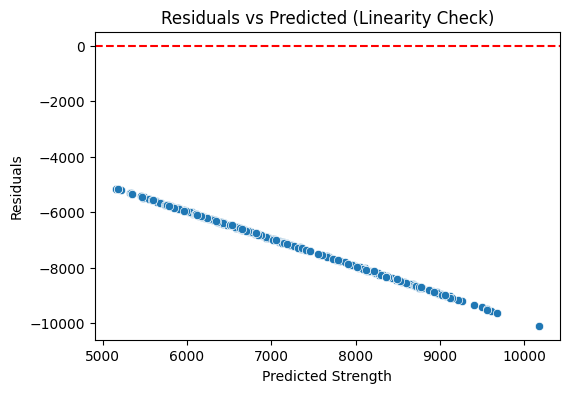

In [ ]:
# Linearity
# Assumption: The relationship between predictors and response is linear.
# Check: Plot predicted values vs residuals. If the residuals are randomly scattered around zero → assumption holds.

# Residuals
y_pred = reg.predict(X_test)   # or X_train depending on check
residuals = y_test - y_pred

# Plot predicted vs residuals
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Strength")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Linearity Check)")
plt.show()

* The residual plot suggests linearity assumption is not satisfied — your model has a systematic bias, consistently predicting values higher than actual. This indicates that a linear regression model may not be adequate for this dataset in its current form.

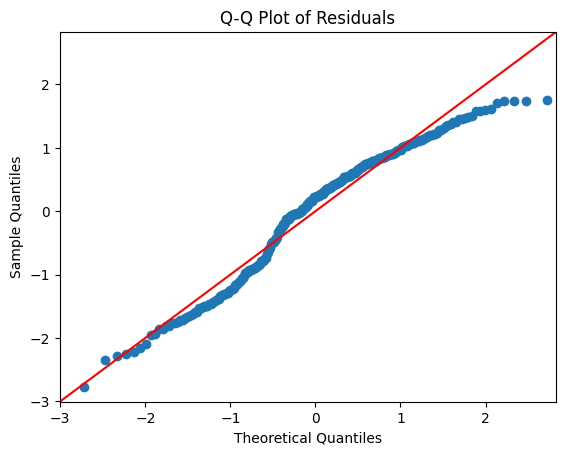

In [ ]:
# 2. Q-Q Plot (Normality of residuals)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

* Insights: The residuals are close enough to normal for linear regression assumptions to be considered valid. But the slight tail deviations might affect confidence intervals or hypothesis tests. Using Ridge/Lasso regression or applying transformations (like log of Strength) could help further stabilize.

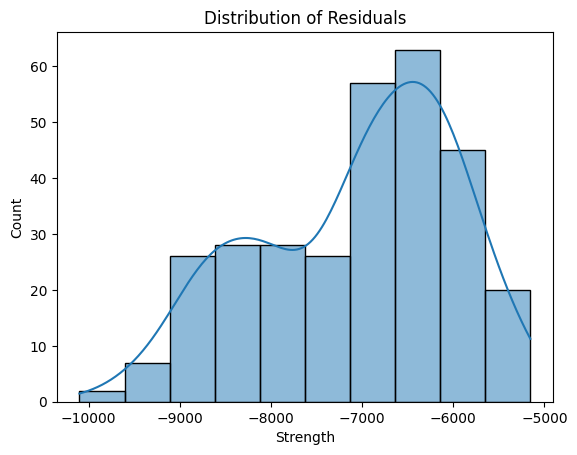

In [ ]:
# 3. Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

* Insight:
* The residuals do not meet the ideal normality assumption (shifted away from zero, mild skew).
* This indicates that your linear regression model might not be capturing the true relationship well.
* Next steps:
* Try Ridge or Lasso regression (to address multicollinearity and stabilize coefficients).
* Consider transforming the target variable (e.g., log(Strength)) if its scale is very large.
* Check if data preprocessing (e.g., scaling, units of Strength) was done correctly — since residuals being all negative is unusual.

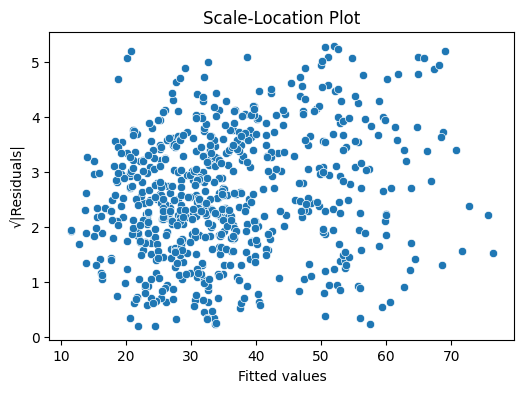

In [ ]:
# 4. Scale-Location plot (Homoscedasticity check)
# Assumption: Residuals have constant variance across all levels of the predictor variables (homoscedasticity).
# Check: Plot fitted values vs square root of standardized residuals. If points are randomly scattered with no clear pattern (like a cone shape) → assumption holds.

# Calculate fitted values using the multiple linear regression model and the scaled training data
fitted = reg.predict(X_train_scaled)
residuals = y_train - fitted

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=np.sqrt(np.abs(residuals)))
plt.xlabel("Fitted values")
plt.ylabel("√|Residuals|")
plt.title("Scale-Location Plot")
plt.show()

* Insights:
* The points are somewhat spread out around the horizontal line but not perfectly flat.
* As fitted values increase (to the right), the spread of √Residuals also increases slightly.
* This suggests a mild heteroscedasticity (variance increases with fitted values).
* The model residuals are not perfectly homoscedastic.
* Predictions for higher fitted values (stronger cement strength) may be less reliable since variance increases.
* This could slightly weaken the assumptions of linear regression.

6. Model Optimization:
- Identify and remove irrelevant or highly correlated predictors to improve the model's performance.  
- Assess the impact of feature selection on the R-squared and Adjusted R-squared values.

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

# RidgeCV with cross-validation alphas
ridge_cv = RidgeCV(alphas=[0.1, 1, 10, 100], cv=5)
ridge_cv.fit(X_train, y_train)
print("Best alpha (Ridge):", ridge_cv.alpha_)

# LassoCV with automatic alpha selection
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)
print("Best alpha (Lasso):", lasso_cv.alpha_)

Best alpha (Ridge): 100.0
Best alpha (Lasso): 0.01


In [ ]:
print("Ridge Coefficients:", ridge_cv.coef_)
print("Lasso Coefficients:", lasso_cv.coef_)

Ridge Coefficients: [ 0.12005451  0.10243085  0.09153097 -0.12203627  0.29919837  0.01558725
  0.02534667  0.1108704 ]
Lasso Coefficients: [ 0.12005118  0.10243142  0.09148596 -0.1215137   0.30161349  0.01567045
  0.0253846   0.11086789]


In [ ]:
# Ridge Regression with Cross-Validation


ridge = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Lasso Regression with Cross-Validation


lasso = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, max_iter=5000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [ ]:
#Evaluation Function

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

# Predict on the test data using the linear regression model
y_pred_lr = reg.predict(X_test_scaled)

results = {
    "Linear Regression": evaluate(y_test, y_pred_lr),
    "Ridge Regression": evaluate(y_test, y_pred_ridge),
    "Lasso Regression": evaluate(y_test, y_pred_lasso)
}

print("Model Evaluation Results:")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

Model Evaluation Results:

Linear Regression:
MSE: 125.1275
MAE: 8.9519
R2: 0.5686

Ridge Regression:
MSE: 125.1128
MAE: 8.9510
R2: 0.5686

Lasso Regression:
MSE: 125.1275
MAE: 8.9519
R2: 0.5686


In [ ]:
# Show Results

results = {
    "Linear Regression": evaluate(y_test, y_pred_lr),
    "Ridge Regression": evaluate(y_test, y_pred_ridge),
    "Lasso Regression": evaluate(y_test, y_pred_lasso)
}
results_df = pd.DataFrame(results).T
print("📊 Model Comparison Results")
print(results_df)

# Best alpha values
print("\nOptimal Ridge alpha:", ridge.alpha_)
print("Optimal Lasso alpha:", lasso.alpha_)

📊 Model Comparison Results
                          MSE       MAE        R2
Linear Regression  125.127542  8.951932  0.568589
Ridge Regression   125.112753  8.951007  0.568640
Lasso Regression   125.127504  8.951931  0.568589

Optimal Ridge alpha: 1000.0
Optimal Lasso alpha: 0.001
